In [2]:
%%time
import sys, os
# import pickle
year = '2023'
path_gen = '/home/eliasmfs/Erasmus MC/Projects/CerebellarLoop'
path_data = f'/mnt/User_Data/UserData/eliasmfs/CerebellarLoop/SlowData/'
path_code = f'{path_gen}/Code/{year}/CerebellarLoop'
path_functions = f'{path_code}/Functions'
sys.path.append(path_data)
sys.path.append(path_functions)

from Run import *
from tqdm import tqdm
from scipy.signal import butter, lfilter, sosfiltfilt, find_peaks
import matplotlib.style as style 
style.use('seaborn-colorblind')


record = {}
record['Noise'] = True
record['PC'] = True
record['DCN'] = True
record['IO'] = True 
record['conn_N_PC'] = True
record['Input_presyn'] = True

save = 1
show = 0

noise_gain_range =  [1]

exp_run = 120000*ms
N_Cells_PC = 100
N_Cells_DCN = 40
N_Cells_IO = 40
N_Cells_PF = 5
plasticity_range = ['no_Plasticity','Plasticity','after_Plasticity']
coupling_range = ['_Coupled','']
zebrin_range = ['positive', 'negative']


seed_number_range = []     
for num in range(2,3):
    seed_number_range.append(f'Paper_all_and_eyeblink') 
    
seed_number = seed_number_range[0]

zebrin = zebrin_range[0]
noise_gain = 1

range_plasticity = ['Plasticity']
range_after_plasticity = ['after_Plasticity']

plas_range = 4
if plas_range > 1:
    for plas_num in range(2,plas_range+1):
        plasticity_range.append(f'Plasticity{plas_num}')
        range_plasticity.append(f'Plasticity{plas_num}')
        plasticity_range.append(f'after_Plasticity{plas_num}')
        range_after_plasticity.append(f'after_Plasticity{plas_num}')
        
f0_range = [0]#,5,10,15,20,25,50,100,800,1000,1100,1200,1300,1400,1500]

parameters_value = { "range_plasticity": range_plasticity, "range_after_plasticity": range_after_plasticity,
                    "PC_I_intrinsic": 0.15, "thresh_M": 60*Hz, "delta_weight_BCM": 0, "delta_weight_CS": -0.1,#-0.02

                    "unfiltered": True, "filtered": True, "f0_range": f0_range, "filter_order": 6, 
                    "positive":{
                        "Uncoupled":{'w_IO_DCN': -2.0, 'PC_DCN': 5.0, 'leak': 0.001, 'gCal': 1.2, 'b_OU': -0.7, 
                                     'sigma_OU': 0.7},
                        'Coupled': {'w_IO_DCN': -2.0, 'PC_DCN': 5.0, 'leak': 0.001, 'gCal': 1.4, 'b_OU': -0.3,
                                    'sigma_OU': 0.7}},
                    'negative':{
                        'Uncoupled': {'w_IO_DCN': -1.8, 'PC_DCN': 4.0, 'leak': 0.001, 'gCal': 1.4, 'b_OU': -0.3,
                                      'sigma_OU': 0.3},
                        'Coupled': {'w_IO_DCN': -1.8, 'PC_DCN': 4.0, 'leak': 0.001, 'gCal': 1.4, 'b_OU': -0.6, 
                                    'sigma_OU': 0.7}}}



Params, Noise_frozen, Values, Synaps, net_name = frozen_tun(seed_number_range,N_Cells_PC,N_Cells_DCN,N_Cells_IO,path_data,exp_run)
IO_num_con = Synaps['Seed_'+str(seed_number)].IO_PC_Synapse_Sources

dt = Params['Seed_'+str(seed_number)].dt
dt_rec = float(Params['Seed_'+str(seed_number)].dt_rec)
time_x = [x * dt for x in range(0,int(exp_run/dt))]
time_x_rec = [x * dt for x in range(0,int(exp_run/dt_rec))]


coupling = '_Coupled'
plasticity = 'no_Plasticity'
f0 = 0

names = {}
for plasticity in plasticity_range:
    if plasticity == 'no_Plasticity': names[f'{plasticity}'] = 'NP'
    elif plasticity == 'Plasticity': names[f'{plasticity}'] = 'P1'
    elif plasticity == 'Plasticity2': names[f'{plasticity}'] = 'P2'
    elif plasticity == 'Plasticity3': names[f'{plasticity}'] = 'P3'
    elif plasticity == 'Plasticity4': names[f'{plasticity}'] = 'P4'
    elif plasticity == 'after_Plasticity': names[f'{plasticity}'] = 'AP1'
    elif plasticity == 'after_Plasticity2': names[f'{plasticity}'] = 'AP2'
    elif plasticity == 'after_Plasticity3': names[f'{plasticity}'] = 'AP3'
    elif plasticity == 'after_Plasticity4': names[f'{plasticity}'] = 'AP4'

cell_pop_sizes = dict(PC=N_Cells_PC,IO=N_Cells_IO,DCN=N_Cells_DCN)


WARNING    <timed exec>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
 [py.warnings]



CPU times: user 31.7 s, sys: 9.27 s, total: 41 s
Wall time: 49.1 s


# Figure S3 - A,B,C

Mann-Whitney u test
  Zebrin positive no_Plasticity
 U = 4930.5, p = 0.867
Degree of freedom 1: 99
Degree of freedom 2: 99
F-statistic: 0.9921461974195666
p-value: 0.4843943939984406


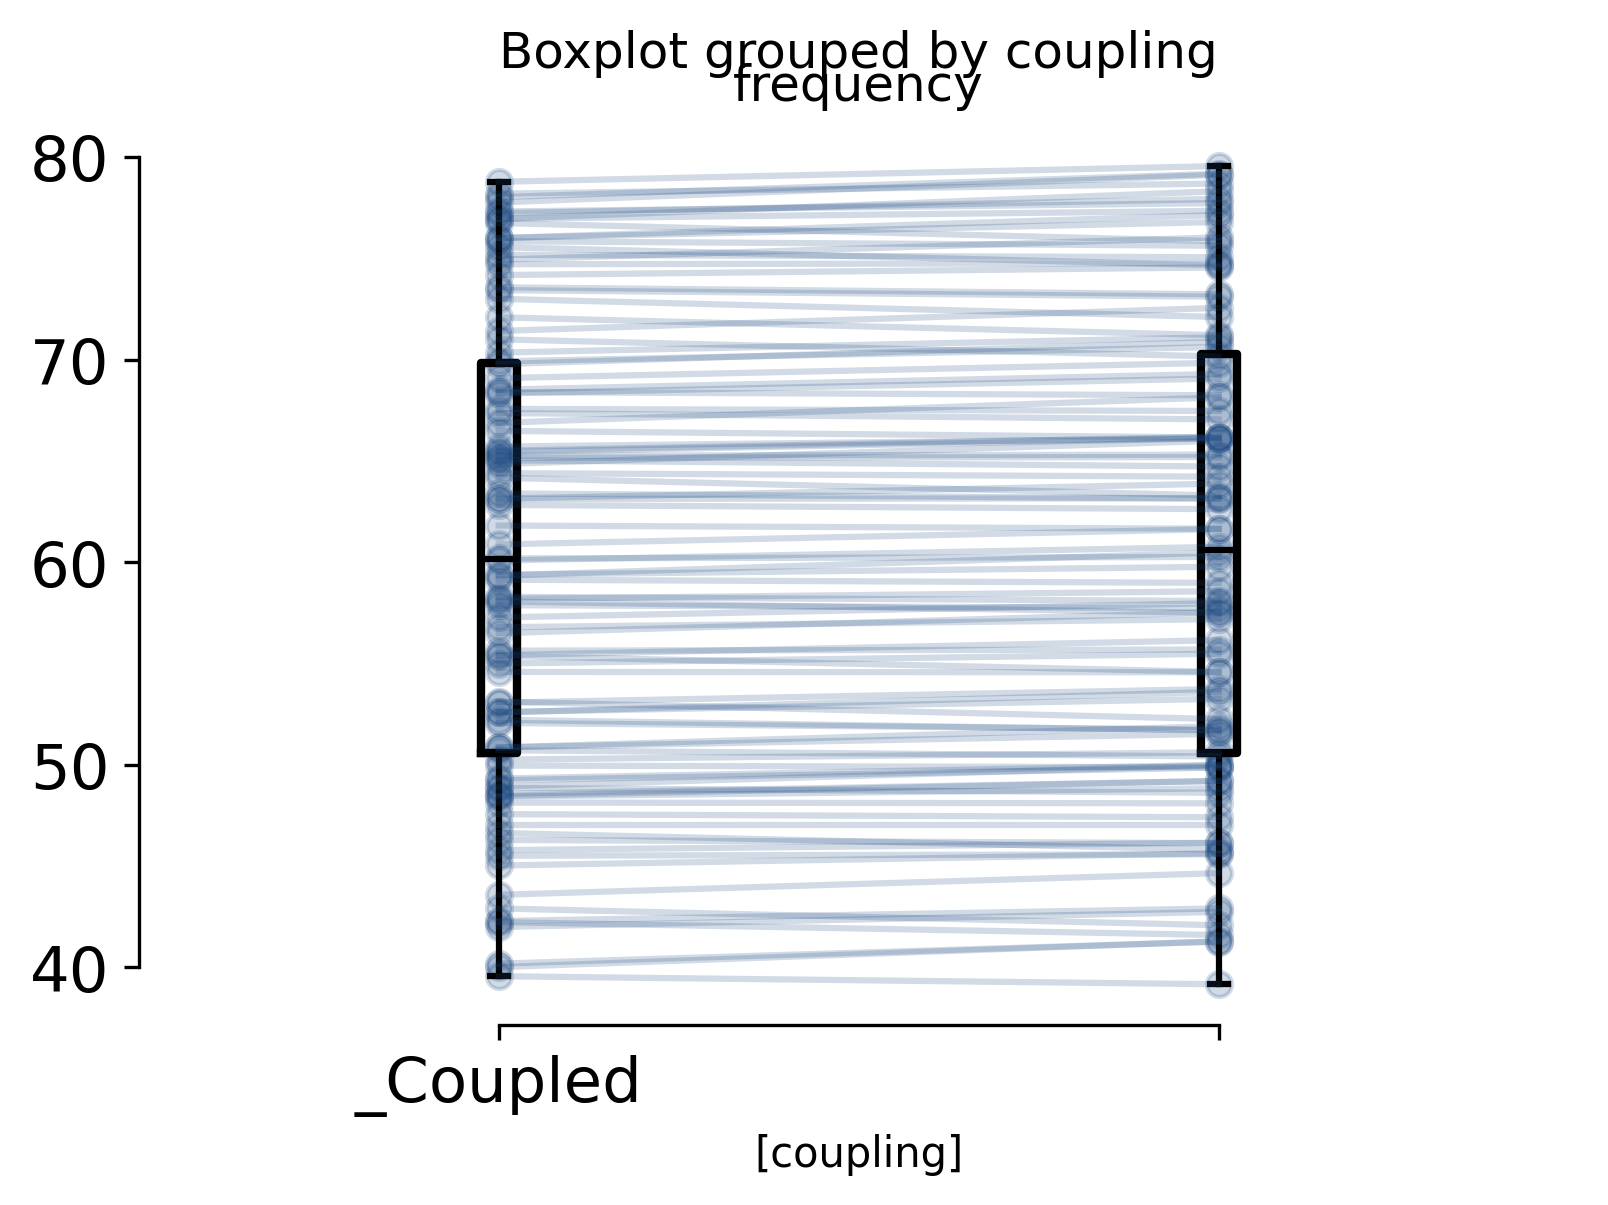

Mann-Whitney u test
  Zebrin positive no_Plasticity
 U = 901.5, p = 0.335
Degree of freedom 1: 39
Degree of freedom 2: 39
F-statistic: 1.1165466819910954
p-value: 0.633802320754798


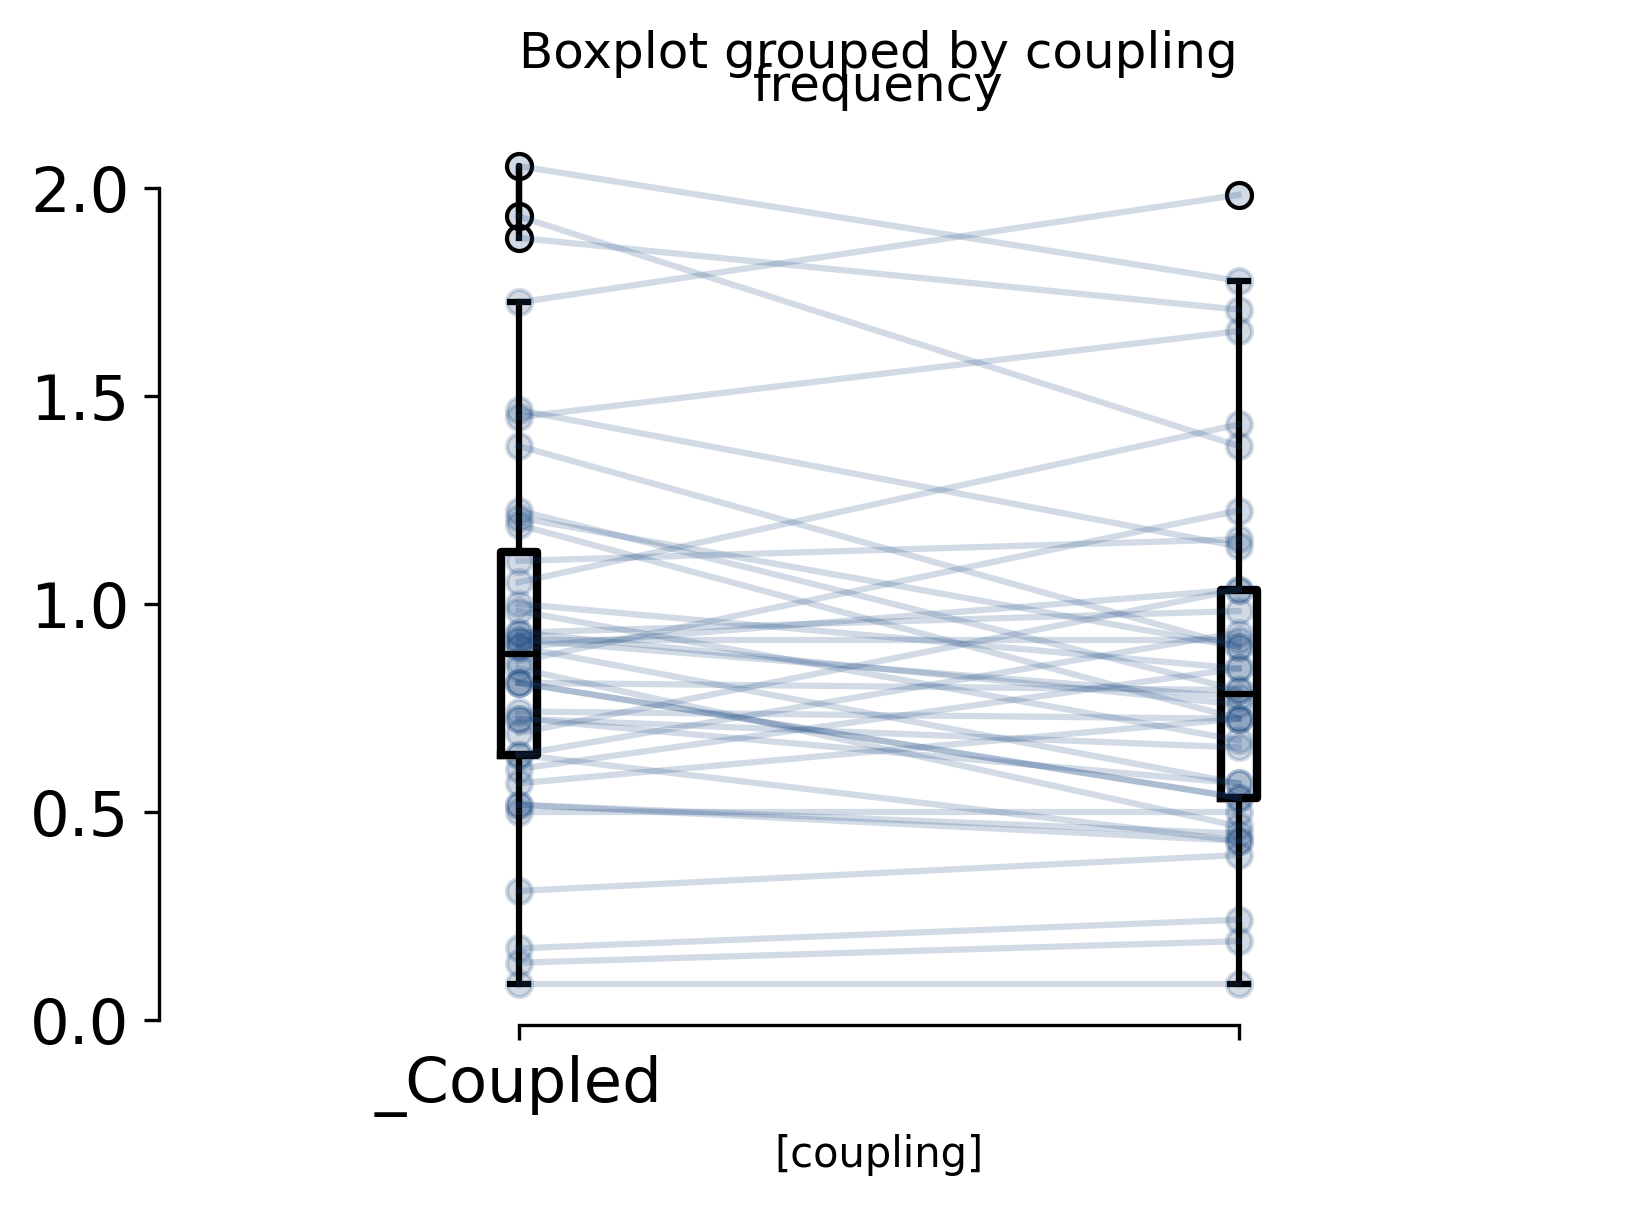

Mann-Whitney u test
  Zebrin positive no_Plasticity
 U = 833.5, p = 0.756
Degree of freedom 1: 39
Degree of freedom 2: 39
F-statistic: 0.9873153514321024
p-value: 0.4842034848432474


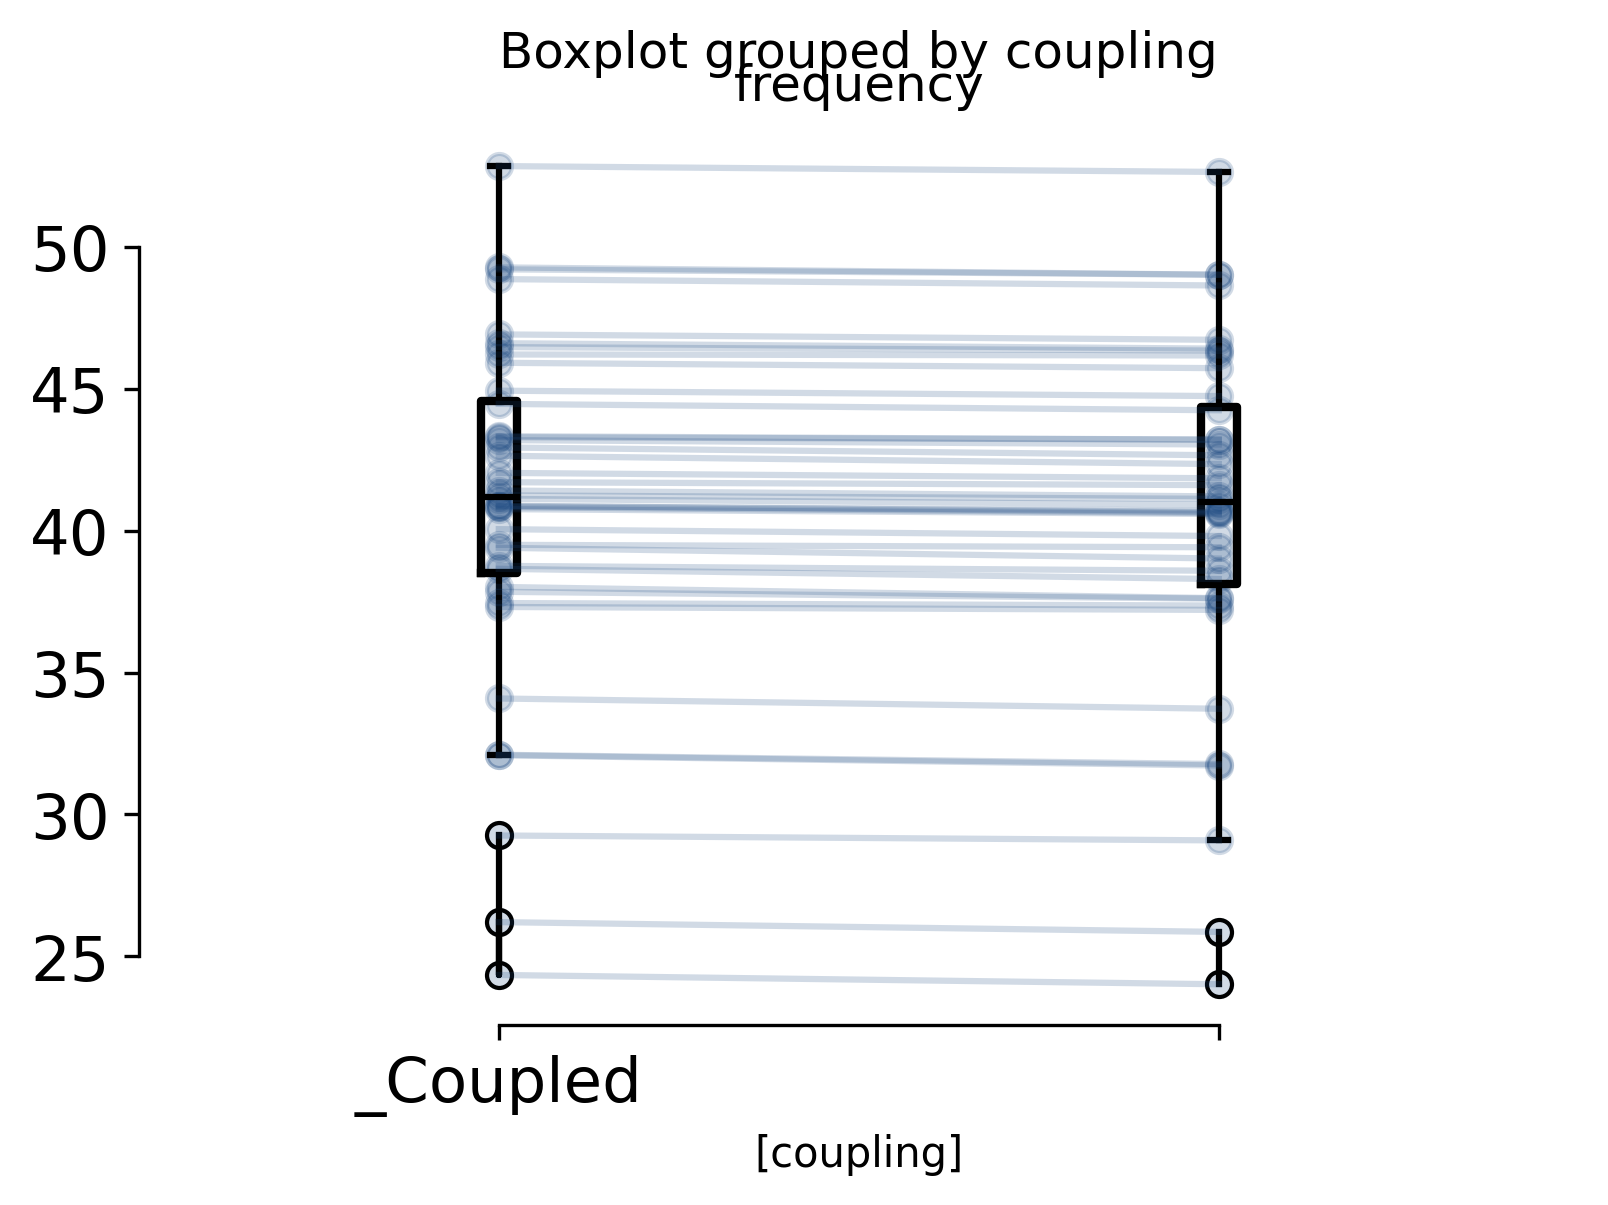

Mann-Whitney u test
  Zebrin negative no_Plasticity
 U = 5042.0, p = 0.919
Degree of freedom 1: 99
Degree of freedom 2: 99
F-statistic: 1.0132188622597504
p-value: 0.5259795393694677


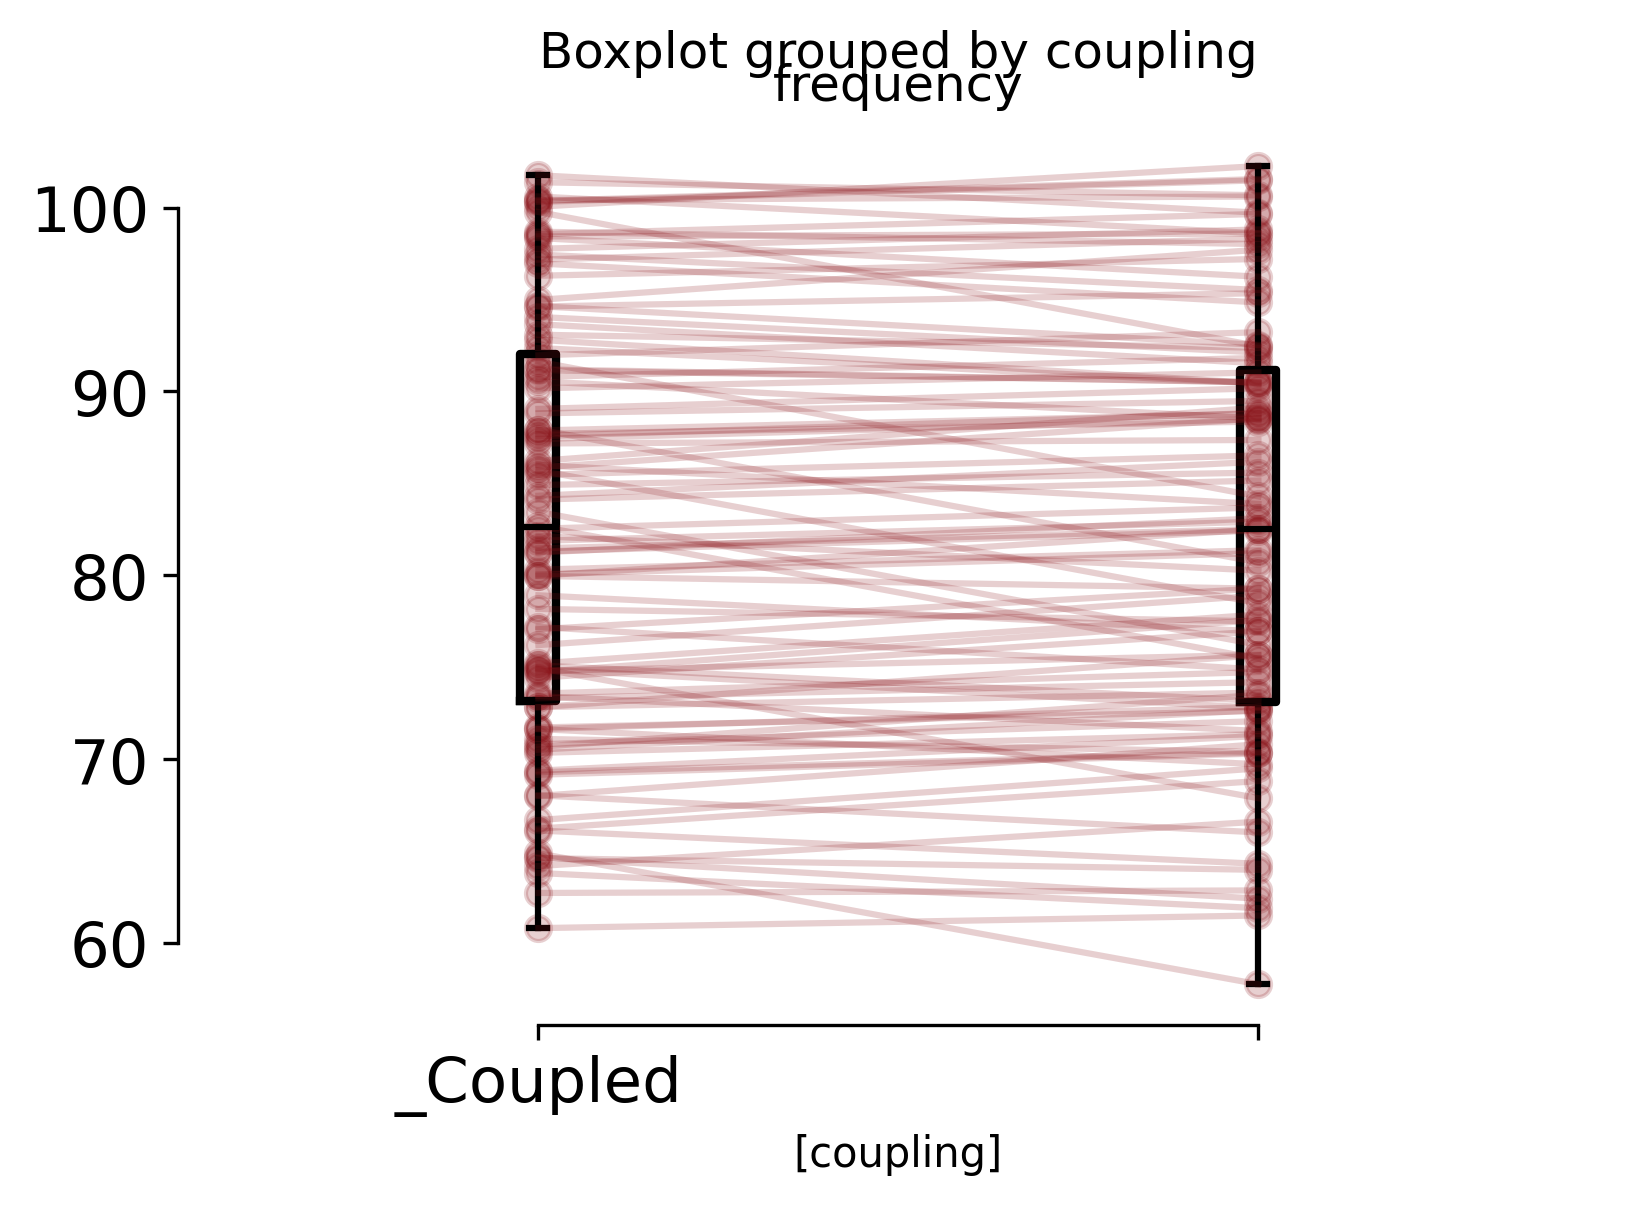

Mann-Whitney u test
  Zebrin negative no_Plasticity
 U = 912.5, p = 0.285
Degree of freedom 1: 39
Degree of freedom 2: 39
F-statistic: 0.18266251149332785
p-value: 2.8371630806755914e-07


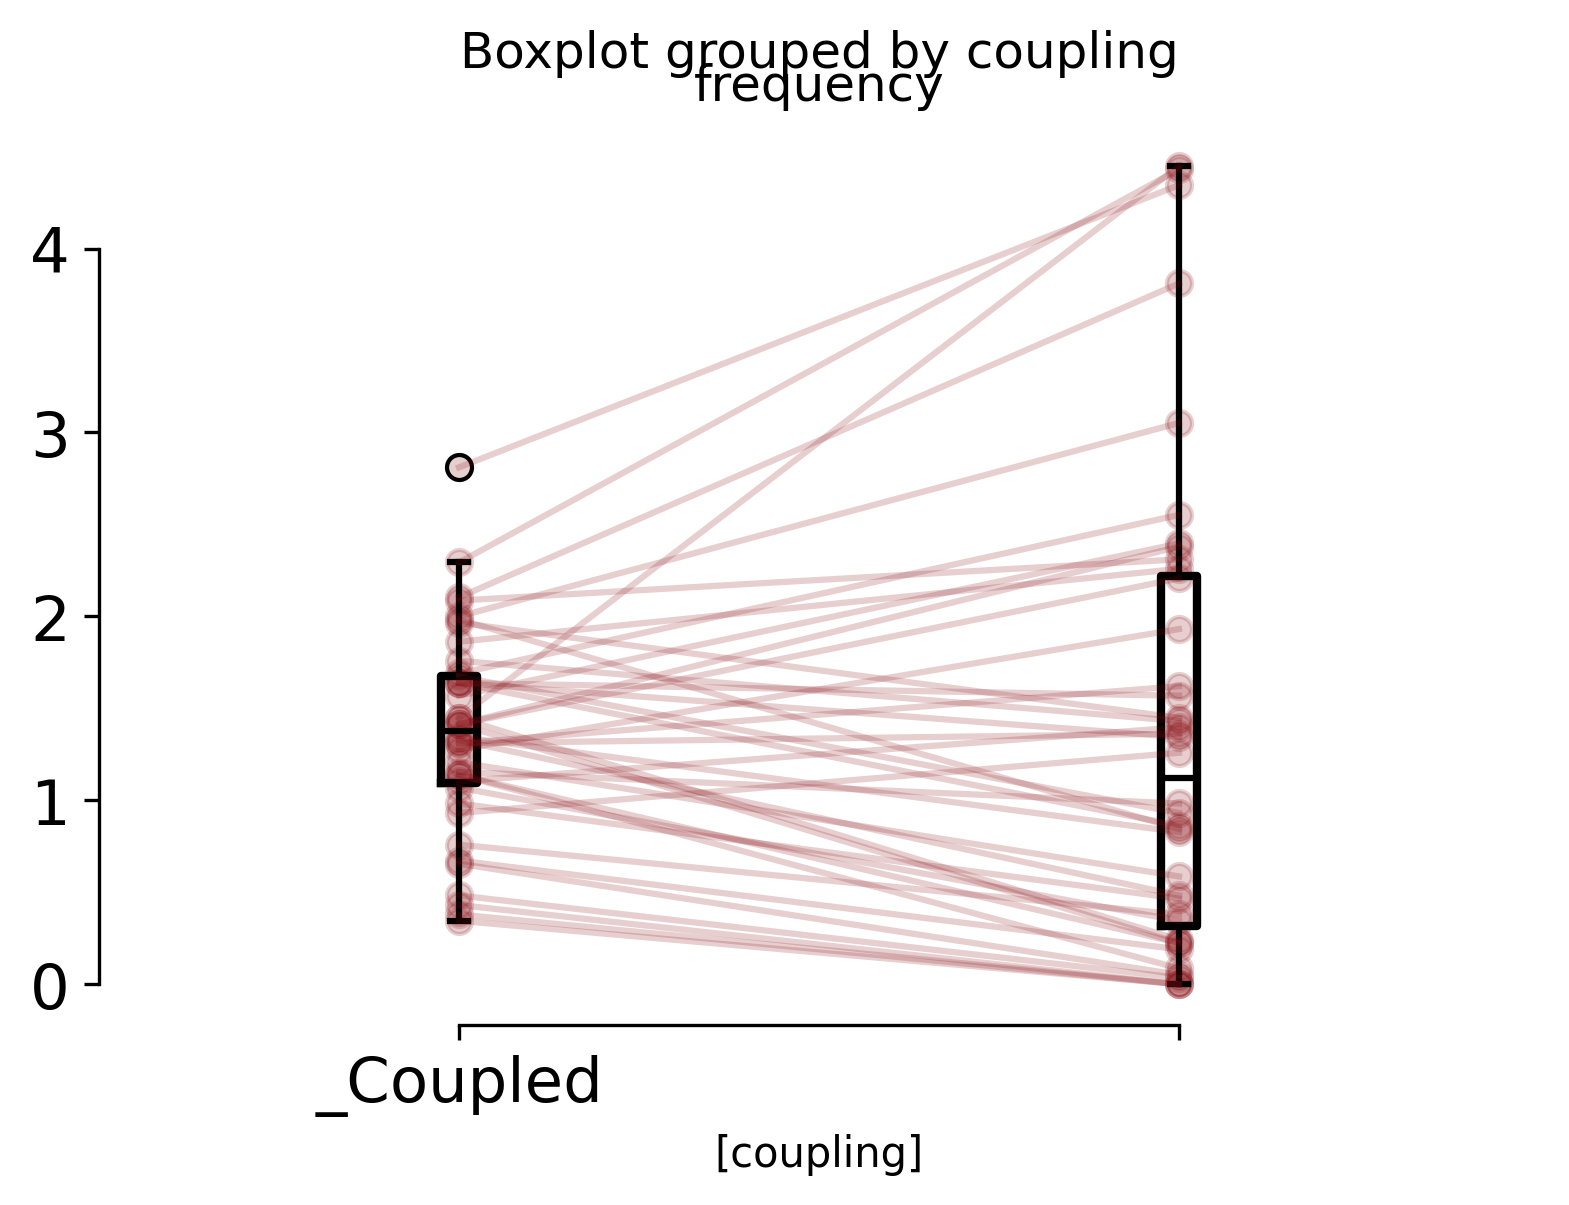

Mann-Whitney u test
  Zebrin negative no_Plasticity
 U = 774.0, p = 0.807
Degree of freedom 1: 39
Degree of freedom 2: 39
F-statistic: 0.9991400565784004
p-value: 0.4989351586753255


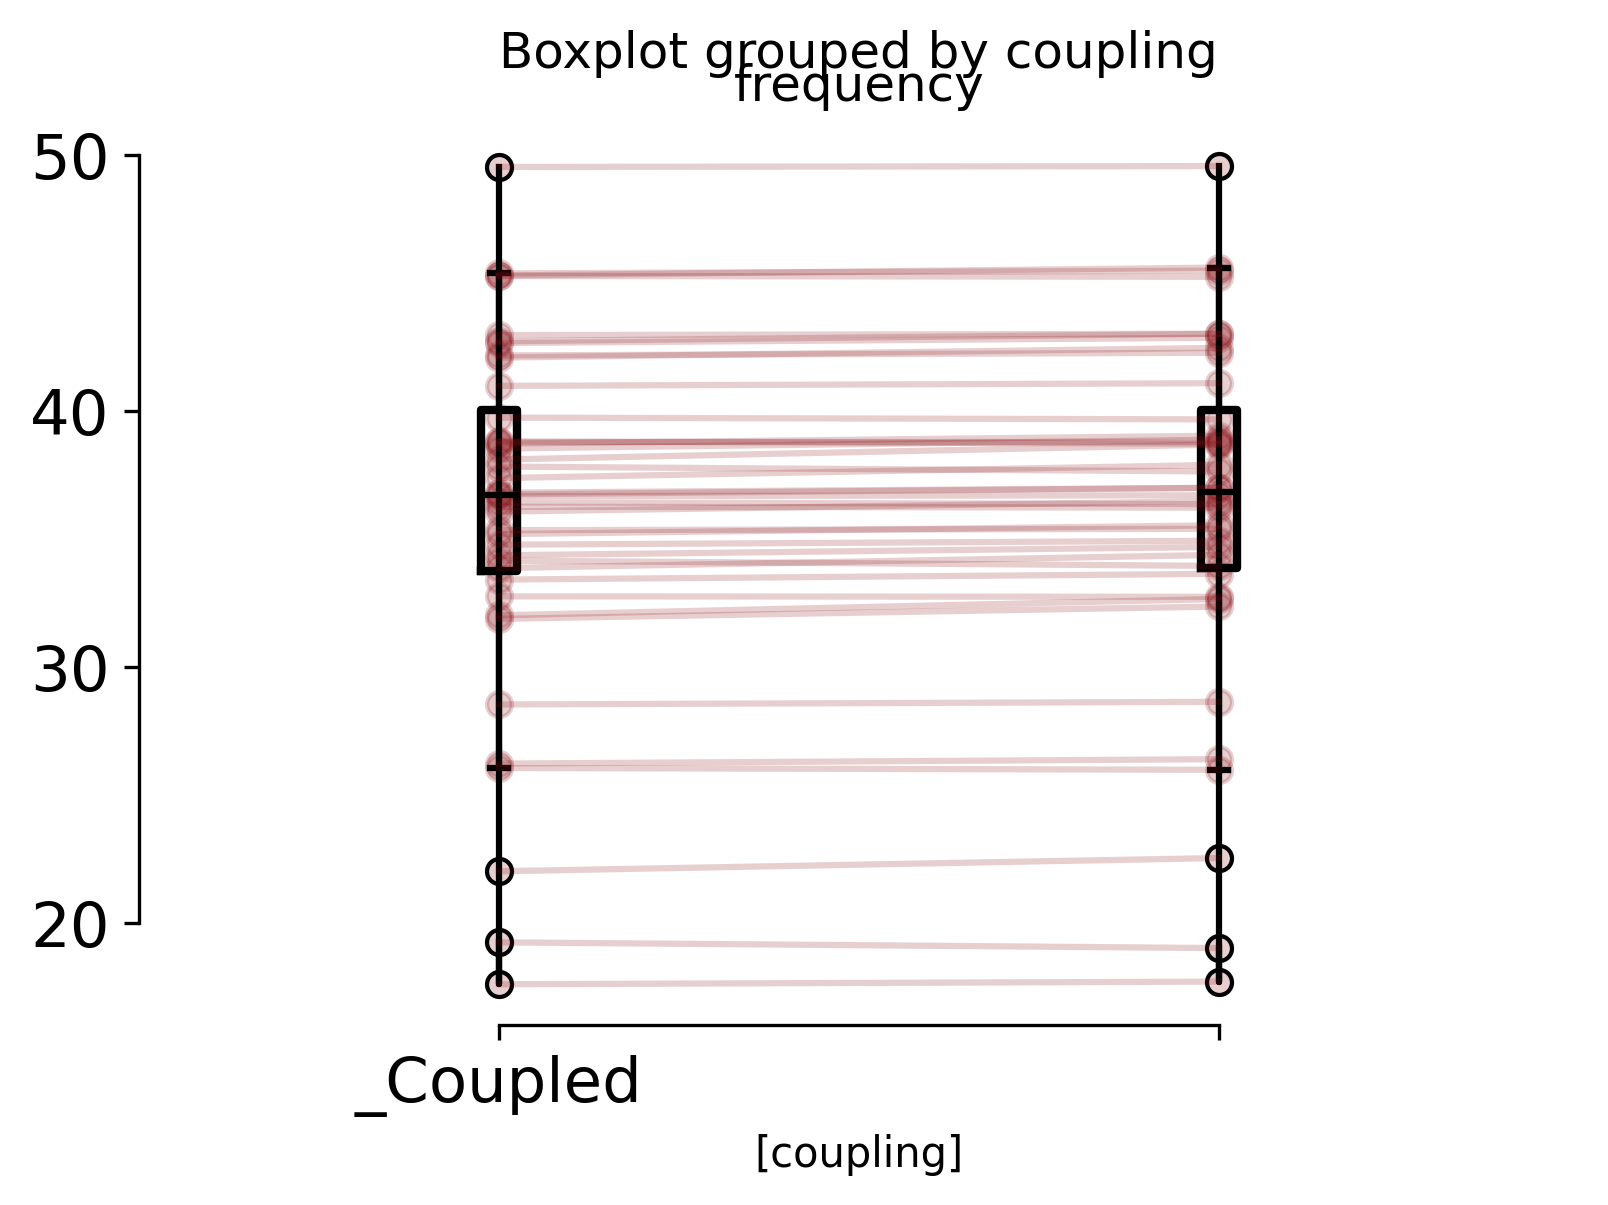

CPU times: user 19.5 s, sys: 4.43 s, total: 23.9 s
Wall time: 19.1 s


In [3]:
%%time
t_start = 1 * second
t_stop = 59 * second
bin_size = 1 * second
coupling = ''
bin_edges = np.arange(t_start, t_stop+bin_size, bin_size)
f0 = 0
cell_num_range = dict(PC=N_Cells_PC,IO=N_Cells_IO)

zebrin_range = ['positive','negative']
data = []
for coupling in (coupling_range):
    for cell_name in ['PC','DCN','IO']:
        for zebrin in zebrin_range:
            for order,plasticity in enumerate(plasticity_range[0:1]):
                spikes_output = output_load_run(f'{cell_name}_Spikes',coupling,seed_number,plasticity,zebrin,noise_gain,exp_run,net_name,path_data,parameters_value,f0)
                for cell_num in range(cell_pop_sizes[cell_name]):
                    spikes = spikes_output[f'{cell_num}']
                    bin_edges = np.arange(t_start, t_stop+bin_size, bin_size)
                    spike_counts, _ = np.histogram(spikes, bins=bin_edges)
                    mean_count = spike_counts / bin_size
                    row = dict(frequency = mean(mean_count/Hz))
                    row['cell'] = cell_name
                    row['plasticity'] = names[f'{plasticity}']
                    row['zebrin'] = zebrin
                    row['coupling'] = coupling
                    row['order'] = f'{order}'+names[f'{plasticity}']
                    data.append(row)
df_ff = pd.DataFrame(data)
var = 'frequency'
for zebrin in zebrin_range:
    for cell_name in ['PC','IO','DCN']:
        df_data = df_ff[(df_ff["zebrin"]==zebrin) & (df_ff["cell"]==cell_name)]
        Q1, Q3 = percentile(df_data['frequency'],[5,95])
        IQR = Q3 - Q1    #IQR is interquartile range. 
        lower_boundary = Q1 - 1.5 * IQR
        upper_boundary = Q3 + 1.5 * IQR
        df_data2 = df_data[(df_data[var] < upper_boundary) & (df_data[var] > lower_boundary)]
        fig = plt.figure(dpi=300)

        flierproperties = dict(markerfacecolor = 'white', markeredgecolor = 'white')
        bp = df_data2.boxplot(column=var, by=['coupling'], grid=False, figsize=(4,3), widths=0.05,fontsize=15,
                             color=dict(boxes='k', whiskers='k', medians='k', caps='k'),
                             boxprops=dict(linestyle='-', linewidth=2),
                             flierprops=dict(linestyle='-', linewidth=1.5),
                             medianprops=dict(linestyle='-', linewidth=1.5, color = 'k'),
                             whiskerprops=dict(linestyle='-', linewidth=1.5),
                             capprops=dict(linestyle='-', linewidth=1.5),ax = plt.gca(),positions=[2,1])  
        colors = dict(positive='#1c4981',negative='#8a1218')   
        x = {}
        y = {}
        for i,coupling in enumerate(coupling_range):
            y[f'{i}'] = df_data2.frequency[(df_data2.coupling==coupling) & (df_data2.plasticity==names[f'{plasticity}'])].dropna()
            x[f'{i}'] = [1+i]*len(y[f'{i}'])#rand_params(1+i, 1, len(y[f'{i}']), 0.007)#np.random.normal(1+j+(len(plasticity_range[0:1]))*i, 0.12, size=len(y))    # Add some random "jitter" to the x-axis
            scatter(x[f'{i}'], y[f'{i}'], color=f'{colors[zebrin]}', alpha=0.2)
        from scipy.stats import mannwhitneyu
        U1, p = mannwhitneyu(y['0'], y['1'], method="exact")
        print(f'Mann-Whitney u test\n  Zebrin {zebrin} {plasticity}\n U = {U1}, p = {round(p,3)}')
        import scipy.stats as stats
        variance1 = np.var(y['0'], ddof=1)
        variance2 = np.var(y['1'], ddof=1)
        f_value = variance1 / variance2
        df1 = len(y['0']) - 1
        df2 = len(y['1']) - 1
        p_value = stats.f.cdf(f_value, df1, df2)
        print('Degree of freedom 1:',df1)
        print('Degree of freedom 2:',df2)
        print("F-statistic:", f_value)
        print("p-value:", p_value)
        toPlot = zip(x['0'], y['0'], x['1'], y['1'])
        for tuple in toPlot:
            plot([tuple[0], tuple[2]], [tuple[1], tuple[3]], color=f'{colors[zebrin]}',alpha=0.2)
        xticks([1,2],coupling_range)
#         if cell_name == 'PC':
#             ylim([30,110])
#         elif cell_name == 'IO':
#             ylim([0,5])
#         elif cell_name == 'DCN':
#             ylim([20,75])
        sns.despine(trim=True)
        plt.show()

# Figure S3 - D,E

Mann-Whitney u test
  Zebrin negative after_Plasticity4
 U = 6761.0, p = 0.0
Degree of freedom 1: 99
Degree of freedom 2: 99
F-statistic: 0.5341717486018674
p-value: 0.0010118537568038755


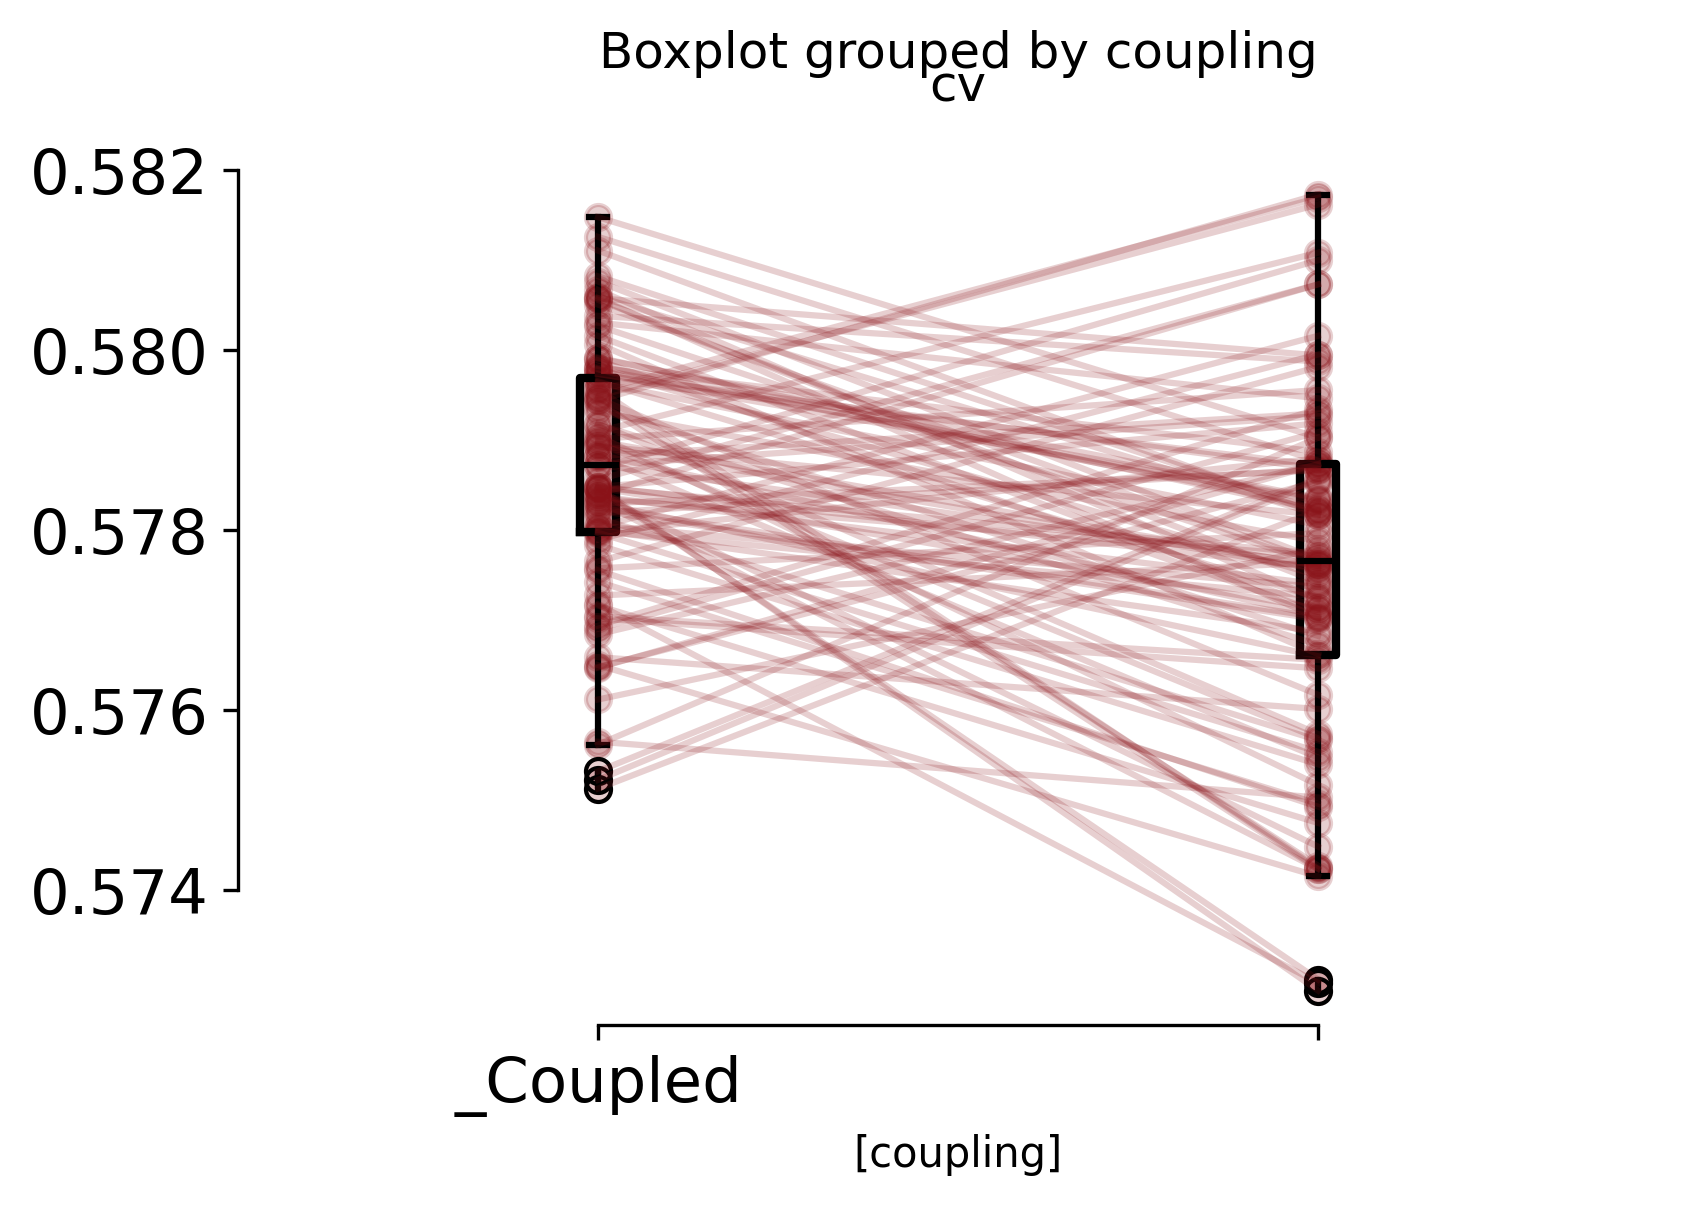

Mann-Whitney u test
  Zebrin negative after_Plasticity4
 U = 604.0, p = 0.168
Degree of freedom 1: 39
Degree of freedom 2: 36
F-statistic: 0.30260911927601747
p-value: 0.0001827649424304827


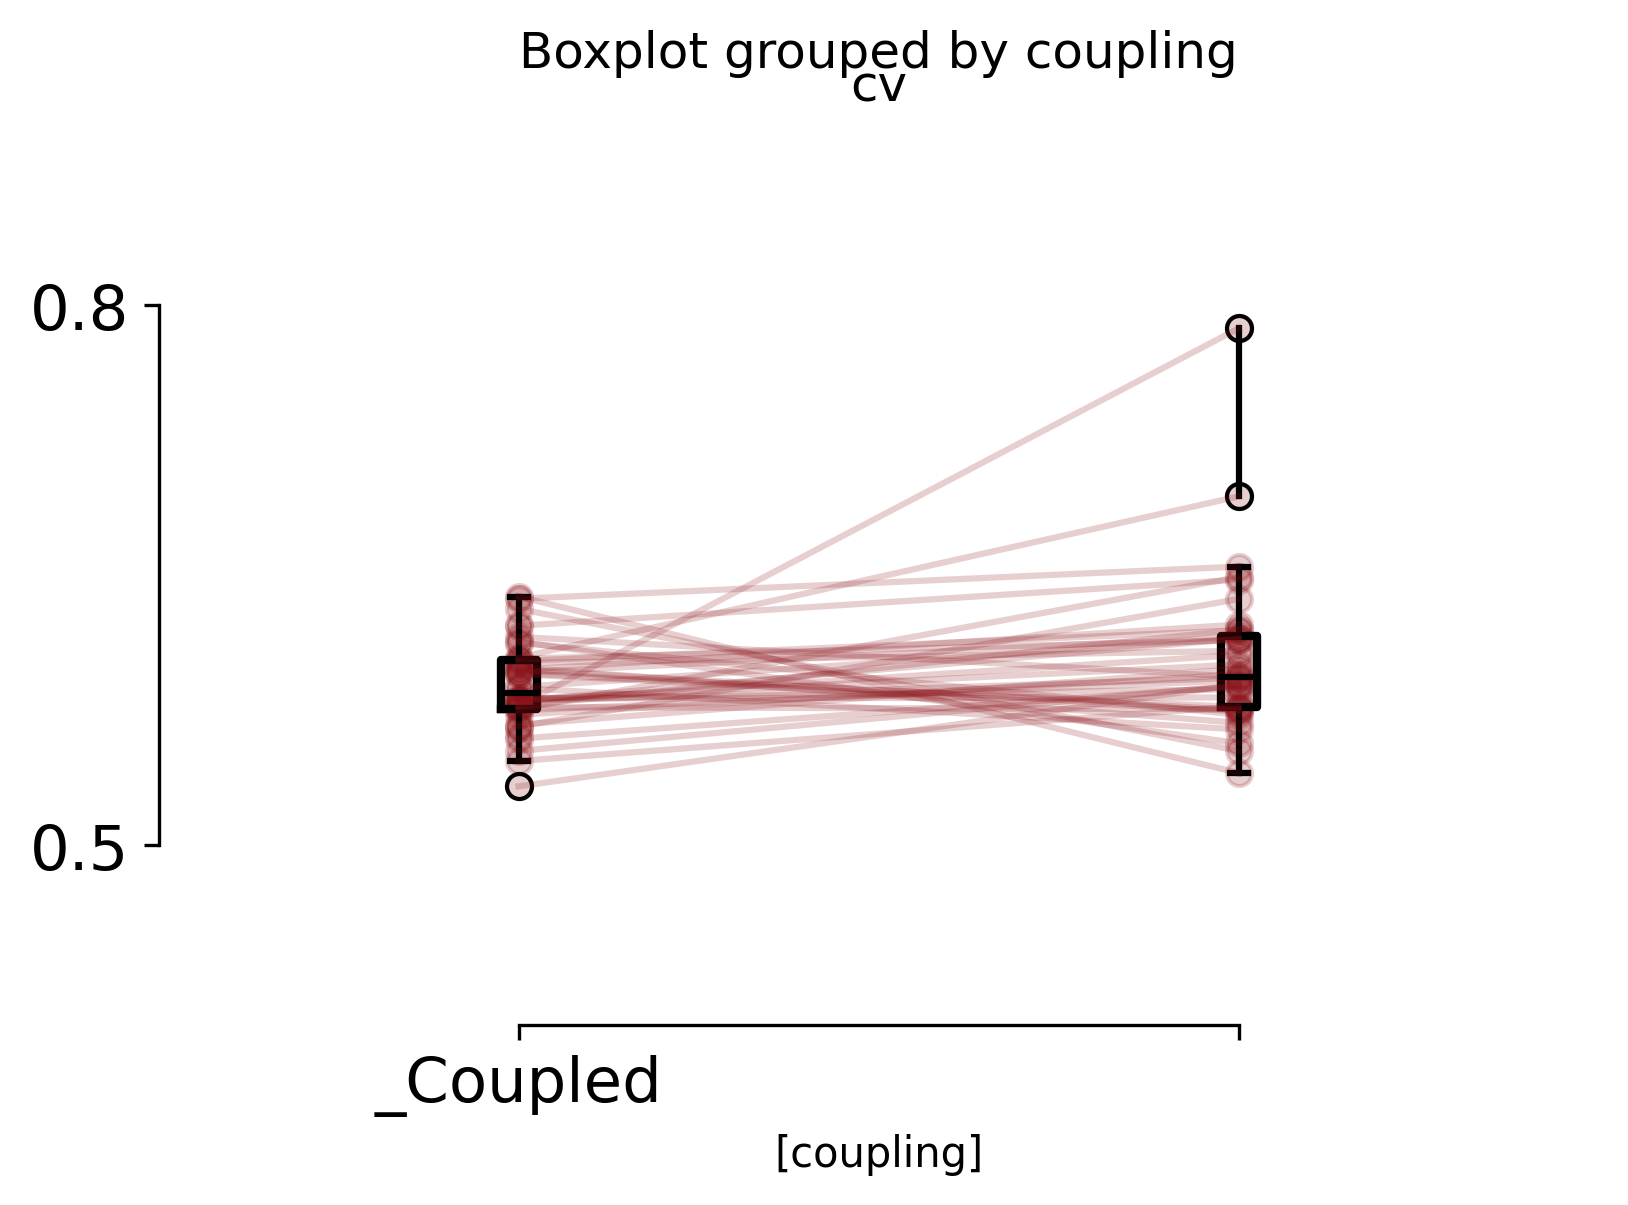

Mann-Whitney u test
  Zebrin positive after_Plasticity4
 U = 4639.0, p = 0.379
Degree of freedom 1: 99
Degree of freedom 2: 99
F-statistic: 1.0109482186639356
p-value: 0.5215459418310444


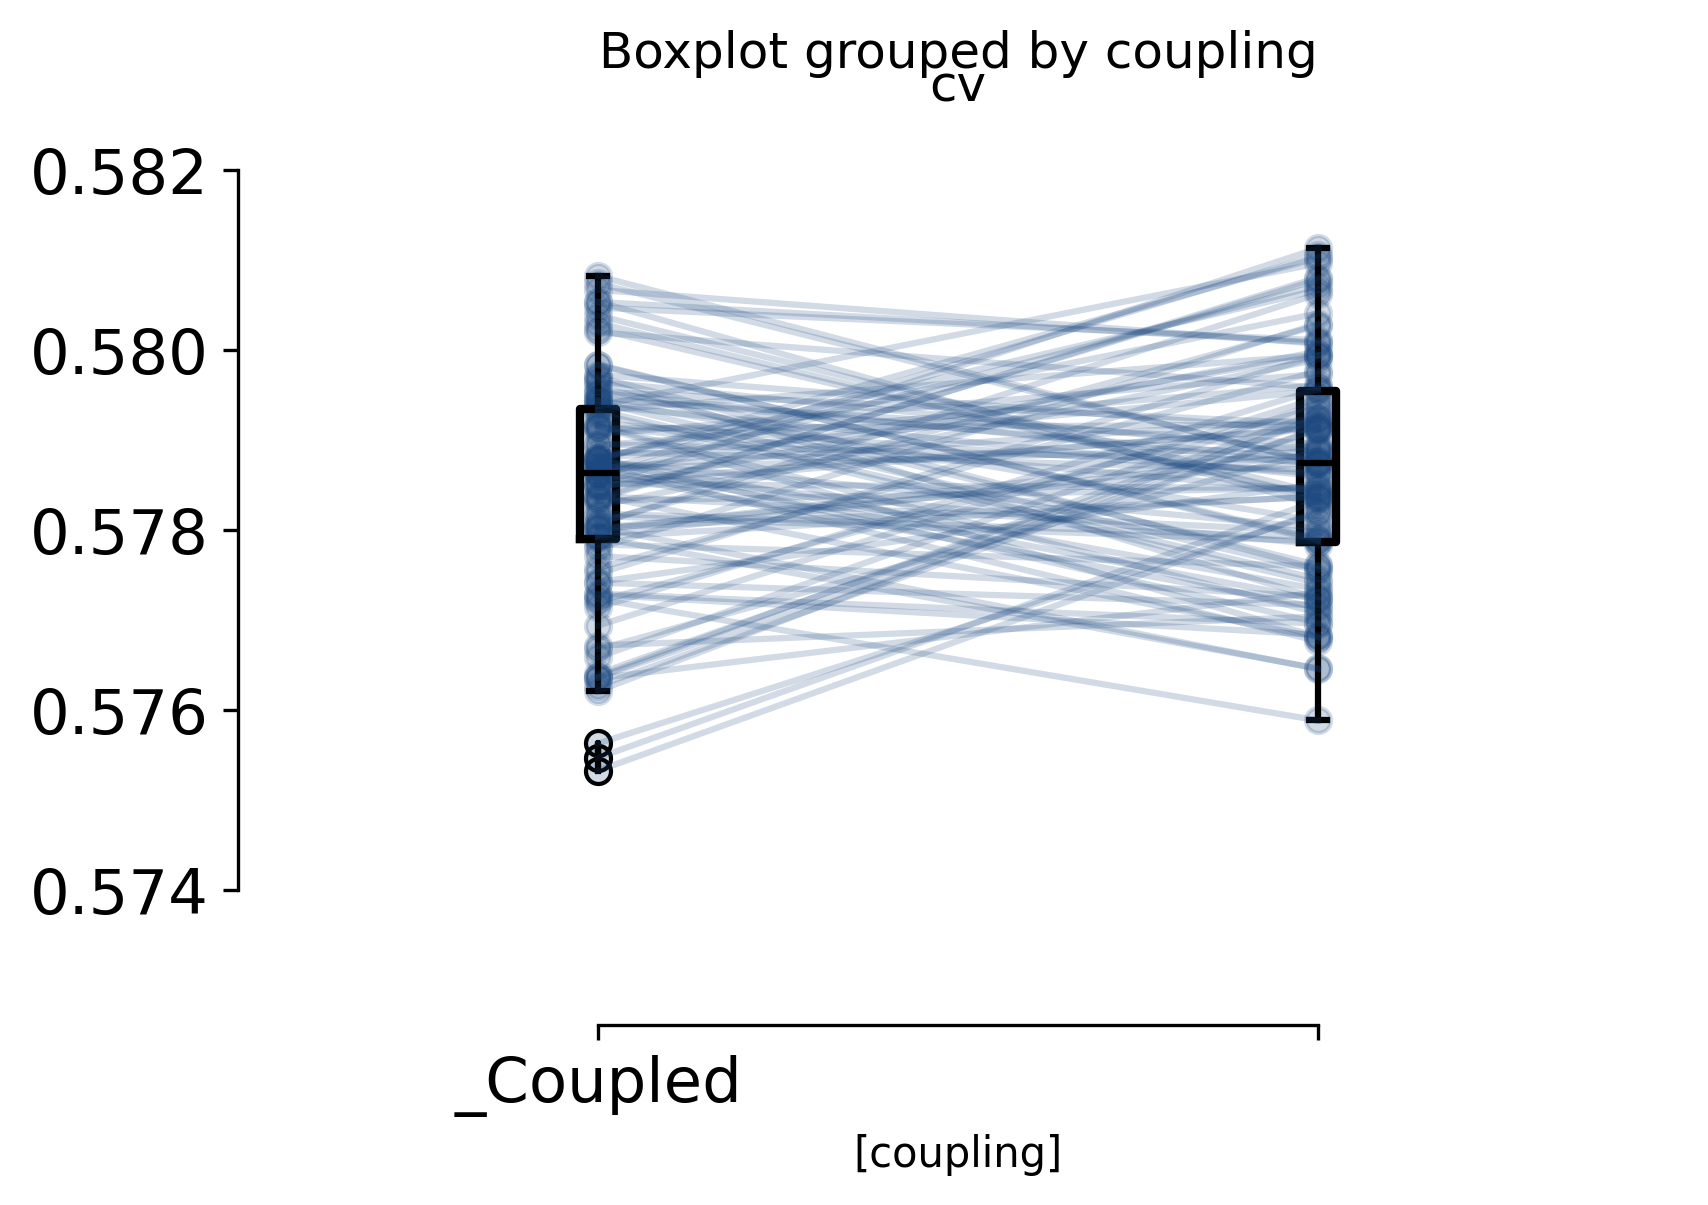

Mann-Whitney u test
  Zebrin positive after_Plasticity4
 U = 799.0, p = 0.857
Degree of freedom 1: 39
Degree of freedom 2: 38
F-statistic: 0.884613305234882
p-value: 0.3522472157107661


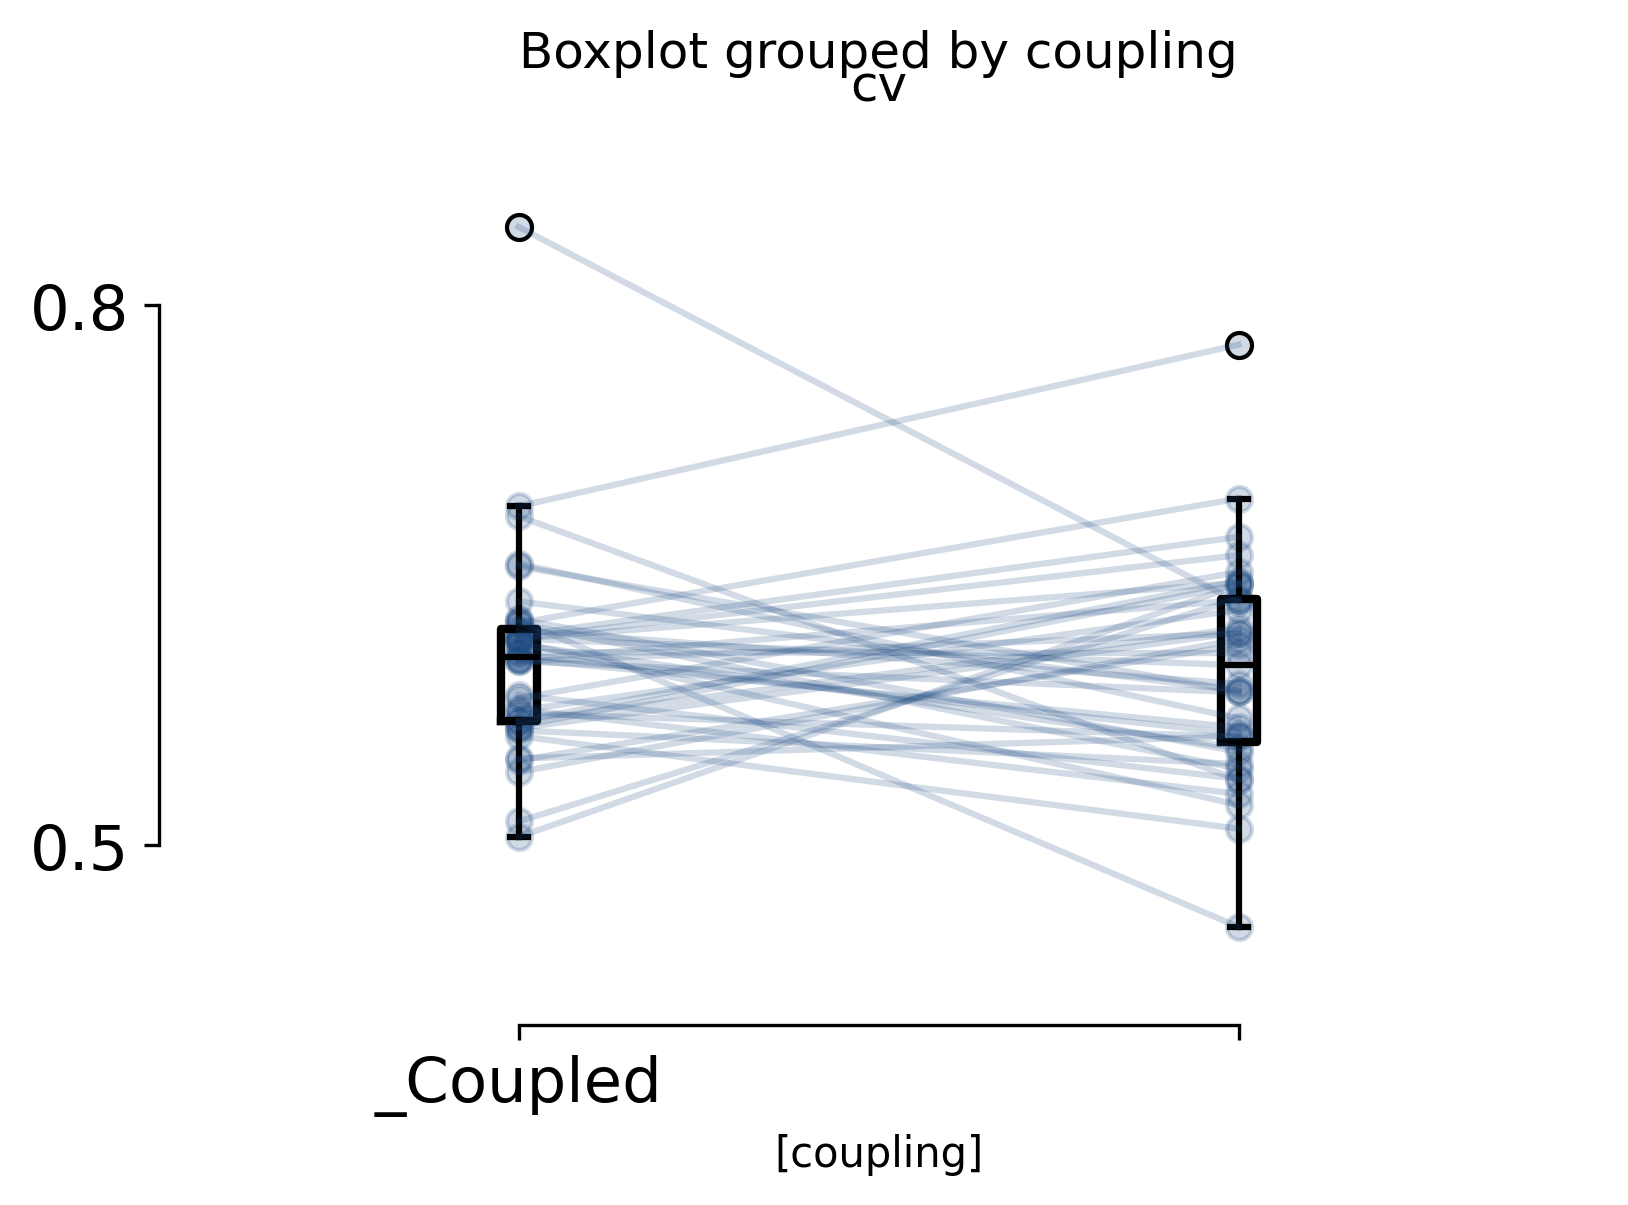

CPU times: user 1.69 s, sys: 631 ms, total: 2.33 s
Wall time: 7.71 s


In [4]:
%%time 
from scipy.stats import variation
zebrin_range = ['negative','positive']
data = []
for coupling in (coupling_range):
    for cell_name in ['PC','DCN','IO']:
        for zebrin in zebrin_range:
            for plasticity in plasticity_range:
                spikes_output = output_load_run(f'{cell_name}_Spikes',coupling,seed_number,plasticity,zebrin,noise_gain,exp_run,net_name,path_data,parameters_value,f0)
                for cell_num in range(cell_pop_sizes[cell_name]):
                    cv_arr = variation(spikes_output[f'{cell_num}'], axis=0)
                    row = dict(cv = cv_arr)
                    row['cell'] = cell_name
                    row['plasticity'] = names[f'{plasticity}']
                    row['zebrin'] = zebrin
                    row['coupling'] = coupling
                    data.append(row)
df_cv = pd.DataFrame(data)

var = 'cv'
for zebrin in zebrin_range:
    for cell_name in ['PC','IO']:
        df_data = df_cv[(df_cv["zebrin"]==zebrin) & (df_cv["cell"]==cell_name) & (df_cv["plasticity"]==names[f'{plasticity}'])]
        Q1, Q3 = percentile(df_data['cv'],[5,95])
        IQR = Q3 - Q1    #IQR is interquartile range. 
        lower_boundary = Q1 - 1.5 * IQR
        upper_boundary = Q3 + 1.5 * IQR
        df_data2 = df_data[(df_data['cv'] < upper_boundary) & (df_data['cv'] > lower_boundary)]
        fig = plt.figure(dpi=300)
        title(f'{cell_name}')

        flierproperties = dict(markerfacecolor = 'white', markeredgecolor = 'white')
        bp = df_data2.boxplot(column=var, by=['coupling'], grid=False, figsize=(4,3), widths=0.05,fontsize=15,
                             color=dict(boxes='k', whiskers='k', medians='k', caps='k'),
                             boxprops=dict(linestyle='-', linewidth=2),
                             flierprops=dict(linestyle='-', linewidth=1.5),
                             medianprops=dict(linestyle='-', linewidth=1.5, color = 'k'),
                             whiskerprops=dict(linestyle='-', linewidth=1.5),
                             capprops=dict(linestyle='-', linewidth=1.5),ax = plt.gca(),positions=[2,1])  
        colors = dict(positive='#1c4981',negative='#8a1218')   
        x = {}
        y = {}
        for i,coupling in enumerate(coupling_range):
            y[f'{i}'] = df_data2.cv[(df_data2.coupling==coupling) & (df_data2.plasticity==names[f'{plasticity}'])].dropna()
            x[f'{i}'] = [1+i]*len(y[f'{i}'])#rand_params(1+i, 1, len(y[f'{i}']), 0.007)#np.random.normal(1+j+(len(plasticity_range[0:1]))*i, 0.12, size=len(y))    # Add some random "jitter" to the x-axis
            scatter(x[f'{i}'], y[f'{i}'], color=f'{colors[zebrin]}', alpha=0.2)
        from scipy.stats import mannwhitneyu
        U1, p = mannwhitneyu(y['0'], y['1'], method="exact")
        print(f'Mann-Whitney u test\n  Zebrin {zebrin} {plasticity}\n U = {U1}, p = {round(p,3)}')
        import scipy.stats as stats
        variance1 = np.var(y['0'], ddof=1)
        variance2 = np.var(y['1'], ddof=1)
        f_value = variance1 / variance2
        df1 = len(y['0']) - 1
        df2 = len(y['1']) - 1
        p_value = stats.f.cdf(f_value, df1, df2)
        print('Degree of freedom 1:',df1)
        print('Degree of freedom 2:',df2)
        print("F-statistic:", f_value)
        print("p-value:", p_value)
        toPlot = zip(x['0'], y['0'], x['1'], y['1'])
        for tuple in toPlot:
            plot([tuple[0], tuple[2]], [tuple[1], tuple[3]], color=f'{colors[zebrin]}',alpha=0.2)
        xticks([1,2],coupling_range)
        if cell_name == 'PC':
            ylim([0.5725,0.5825])
        if cell_name == 'IO':
            ylim([0.4,0.9])
            yticks([0.5,0.8])
#         elif cell_name == 'DCN':
#             ylim([20,75])
        sns.despine(trim=True)
        plt.show()

# Figure S3 - F

Mann-Whitney u test
  Zebrin positive no_Plasticity
 U = 4462.0, p = 0.19
Degree of freedom 1: 99
Degree of freedom 2: 99
F-statistic: 0.970644702169099
p-value: 0.44123032447762645


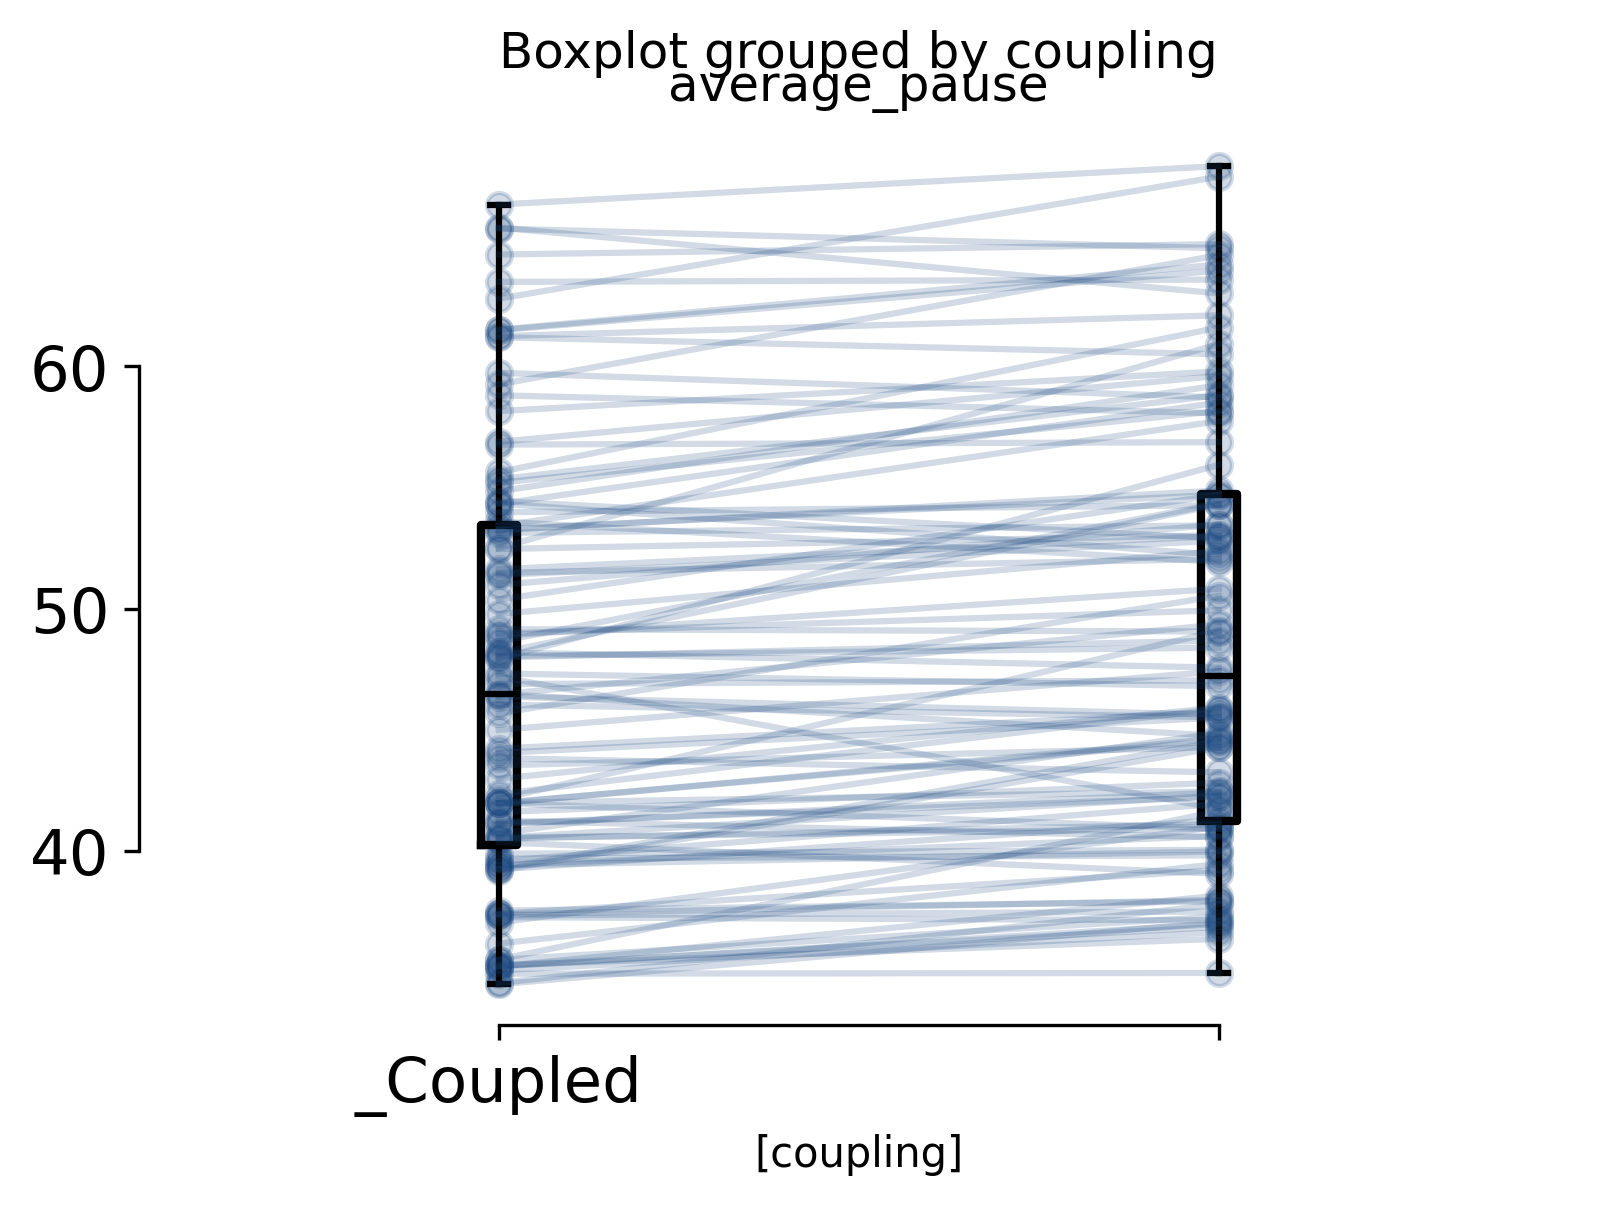

Mann-Whitney u test
  Zebrin negative no_Plasticity
 U = 5275.0, p = 0.503
Degree of freedom 1: 99
Degree of freedom 2: 99
F-statistic: 0.9100607758699063
p-value: 0.3200393692325078


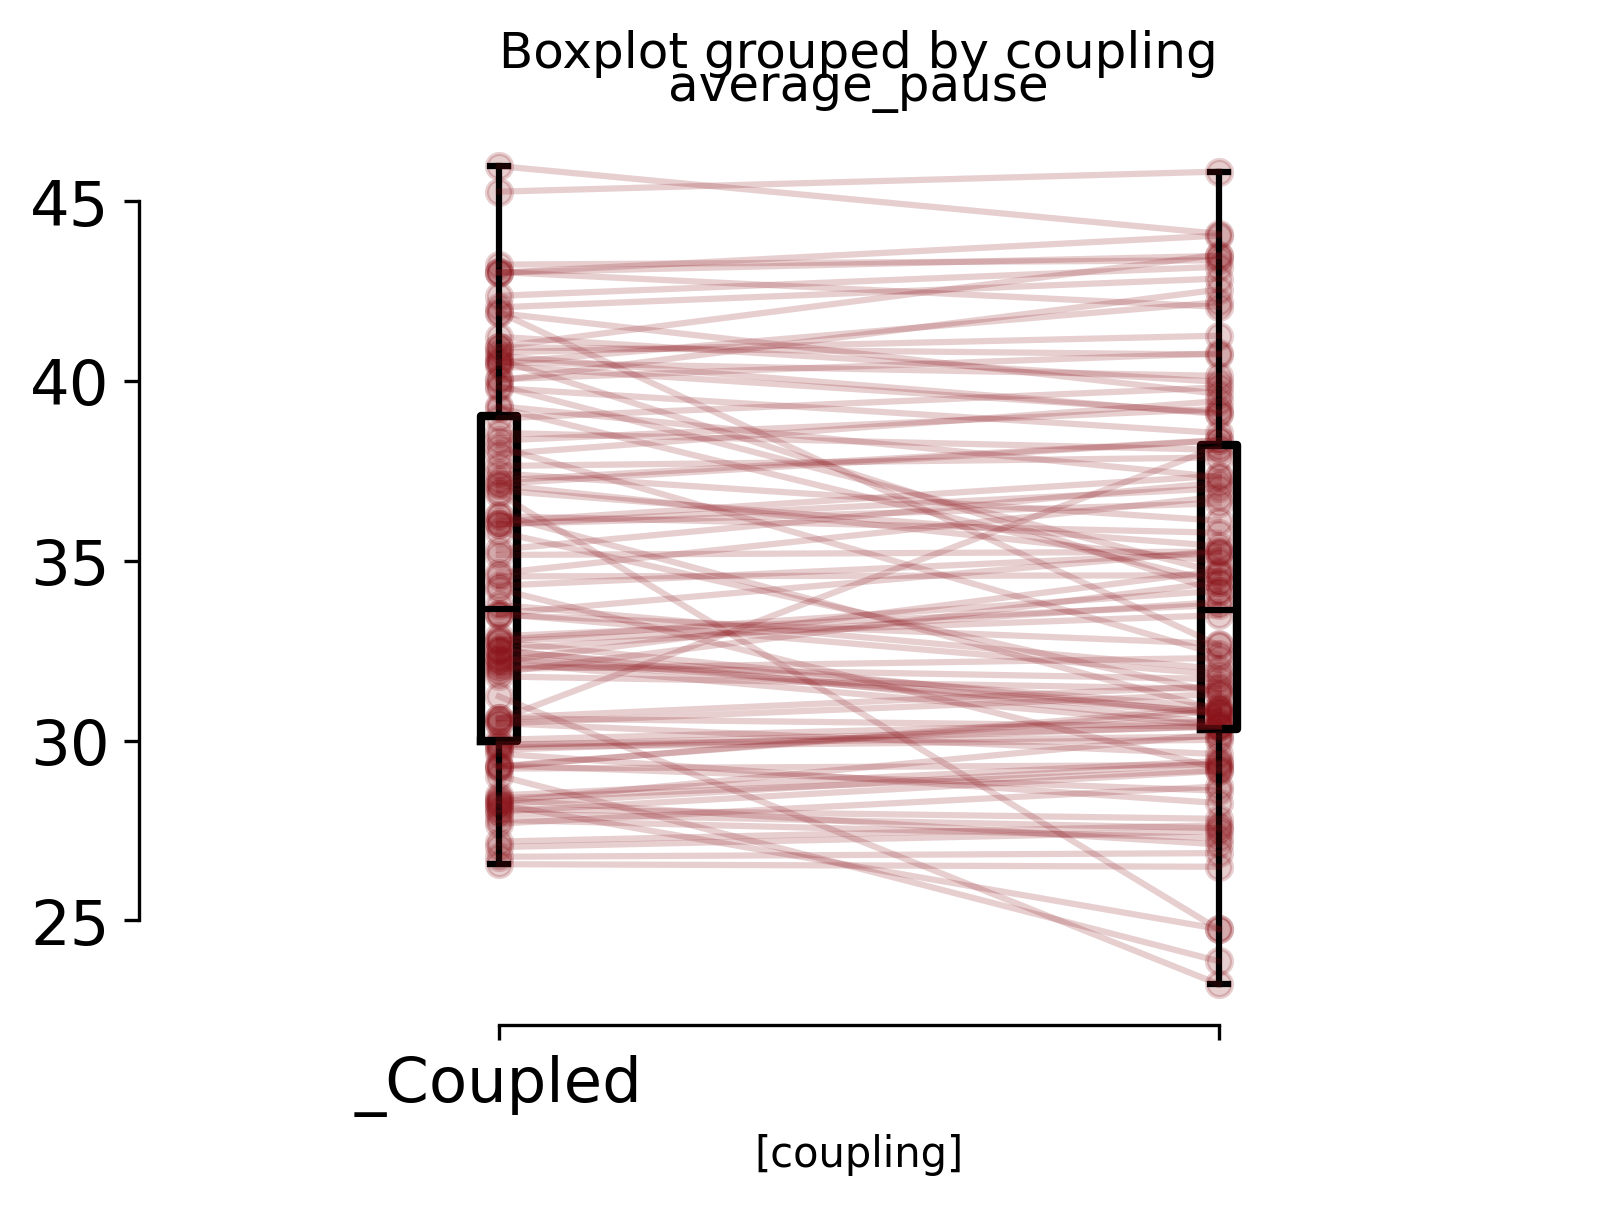

CPU times: user 31.6 s, sys: 290 ms, total: 31.9 s
Wall time: 31.9 s


In [5]:
%%time 

skip = 5*ms/second # seconds
transient_time = 10000
data = []
# 
for zebrin in zebrin_range:
    zeb_name = 'Z+'
    if zebrin == 'negative': zeb_name = 'Z-'
    for coupling in coupling_range:
        coup_name = 'Coup'
        if coupling == '': coup_name = 'Uncoup'
        for plasticity in plasticity_range[0:1]:
            plas_name = 'NP'
            if plasticity == 'Plasticity': plas_name = 'P'
            elif plasticity == 'after_Plasticity': plas_name = 'AP'
            IO_num_con = Synaps['Seed_'+str(seed_number)].IO_PC_Synapse_Sources
            IO_Spikes = output_load_run('IO_Spikes',coupling,seed_number,plasticity,zebrin,noise_gain,exp_run,net_name,path_data,parameters_value,f0)
            PC_Spikes = output_load_run('PC_Spikes',coupling,seed_number,plasticity,zebrin,noise_gain,exp_run,net_name,path_data,parameters_value,f0)
            for pc_cell_id in range(N_Cells_PC):
                pauses = []
                io_cell_id = IO_num_con[pc_cell_id]
                row = dict(PC=pc_cell_id)
                row['IO'] = io_cell_id
                for io_spike in IO_Spikes[f'{io_cell_id}']:
                    if io_spike < transient_time*ms/second: continue
                    hit = None
                    for pc_spike in PC_Spikes[f'{pc_cell_id}']:
                        if pc_spike <= io_spike+skip:
                            continue
                        hit = pc_spike
                        break
                    if hit is not None:
                        pauses.append((hit - io_spike))
                pauses = np.array(pauses)*1e3
                row['average_pause'] = mean(pauses)
                row['zebrin'] = zebrin
                row['plasticity'] = plasticity
                row['coupling'] = coupling
                data.append(row)
                
df_pauses = pd.DataFrame(data).dropna()


t_start = 1 * second
t_stop = 59 * second
bin_size = 1 * second
coupling = ''
bin_edges = np.arange(t_start, t_stop+bin_size, bin_size)
f0 = 0
cell_num_range = dict(PC=N_Cells_PC,IO=N_Cells_IO)

zebrin_range = ['positive','negative']
var = 'average_pause'
for zebrin in zebrin_range:
    df_data = df_pauses[(df_pauses["zebrin"]==zebrin)&(df_pauses["plasticity"]==plasticity)]
    Q1, Q3 = percentile(df_data['average_pause'],[5,95])
    IQR = Q3 - Q1    #IQR is interquartile range. 
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_data2 = df_data[(df_data[var] < upper_boundary) & (df_data[var] > lower_boundary)]
    fig = plt.figure(dpi=300)

    flierproperties = dict(markerfacecolor = 'white', markeredgecolor = 'white')
    bp = df_data2.boxplot(column=var, by=['coupling'], grid=False, figsize=(4,3), widths=0.05,fontsize=15,
                         color=dict(boxes='k', whiskers='k', medians='k', caps='k'),
                         boxprops=dict(linestyle='-', linewidth=2),
                         flierprops=dict(linestyle='-', linewidth=1.5),
                         medianprops=dict(linestyle='-', linewidth=1.5, color = 'k'),
                         whiskerprops=dict(linestyle='-', linewidth=1.5),
                         capprops=dict(linestyle='-', linewidth=1.5),ax = plt.gca(),positions=[2,1])  
    colors = dict(positive='#1c4981',negative='#8a1218')   
    x = {}
    y = {}
    for i,coupling in enumerate(coupling_range):
        y[f'{i}'] = df_data2.average_pause[(df_data2.coupling==coupling)].dropna()
        x[f'{i}'] = [1+i]*len(y[f'{i}'])#rand_params(1+i, 1, len(y[f'{i}']), 0.007)#np.random.normal(1+j+(len(plasticity_range[0:1]))*i, 0.12, size=len(y))    # Add some random "jitter" to the x-axis
        scatter(x[f'{i}'], y[f'{i}'], color=f'{colors[zebrin]}', alpha=0.2)
    from scipy.stats import mannwhitneyu
    U1, p = mannwhitneyu(y['0'], y['1'], method="exact")
    print(f'Mann-Whitney u test\n  Zebrin {zebrin} {plasticity}\n U = {U1}, p = {round(p,3)}')
    import scipy.stats as stats
    variance1 = np.var(y['0'], ddof=1)
    variance2 = np.var(y['1'], ddof=1)
    f_value = variance1 / variance2
    df1 = len(y['0']) - 1
    df2 = len(y['1']) - 1
    p_value = stats.f.cdf(f_value, df1, df2)
    print('Degree of freedom 1:',df1)
    print('Degree of freedom 2:',df2)
    print("F-statistic:", f_value)
    print("p-value:", p_value)
    toPlot = zip(x['0'], y['0'], x['1'], y['1'])
    for tuple in toPlot:
        plot([tuple[0], tuple[2]], [tuple[1], tuple[3]], color=f'{colors[zebrin]}',alpha=0.2)
    xticks([1,2],coupling_range)
    sns.despine(trim=True)
    plt.show()